#### Importación de bibliotecas

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Conexión a MySQL

In [4]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\jodri\AppData\Local\Temp\ipykernel_8680\3597080797.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"


#### Exploración inicial

In [5]:
df = Tourist_Accommodation
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


##### Tamaño

In [6]:
df.shape

(10000, 35)

##### Tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

##### Valores nulos

In [8]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

##### Duplicados

In [9]:
df.duplicated().sum()

0

##### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1021.37               974.85    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.95                17.73     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.77               498.37     1.0      62.0   1125.0    1125.0   1125.0
availability_30                13.01                11.84     0.0       0.0     11.0      26.0     30.0
availability_60                28.76                22.97     0.0       2.0     29.0      53.0     60.0
availability_90                46.11                33.75     0.0      10.0     49.0      80.0     90.0
availability_365           

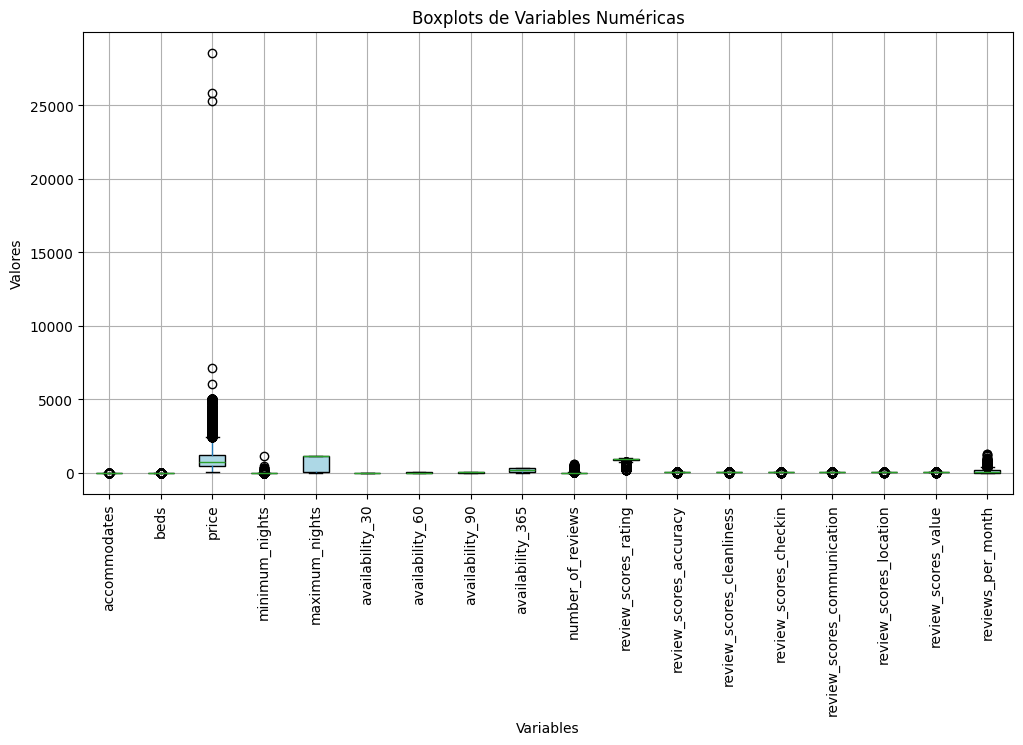

In [10]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

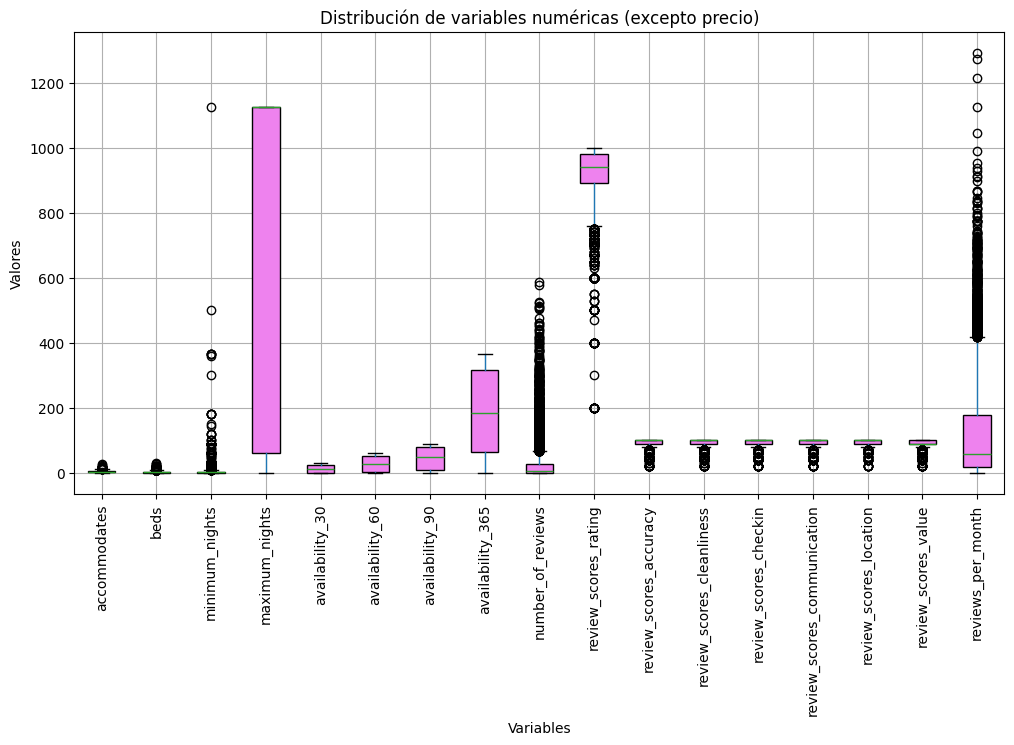

In [11]:
# nuevo gráfico para poder ver mejor las distribuciones

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

#### 3. Limpieza de datos (Data Cleaning)

##### Tratamiento de duplicados

In [12]:
# Verificar los apartment_id duplicados
duplicados = df['apartment_id'].duplicated().sum()

print(f"El número de apartment_id duplicados es: {duplicados}")

El número de apartment_id duplicados es: 350


In [13]:
# Filtrr las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,2,365,VERDADERO,22,52,82,357,32,04/07/2011,04/08/2016,870.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,42.0,spain,barcelona,12/09/2017
23,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wifi,Wheelchair accessible,Elevator,Heating,Fa...",490.0,2,365,VERDADERO,19,49,79,354,34,04/07/2011,15/08/2018,880.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,38.0,spain,barcelona,10/10/2018
24,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",NaN,7,90,VERDADERO,27,57,87,362,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,2.0,spain,girona,30/04/2020
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",5000.0,7,60,VERDADERO,26,56,86,361,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,3.0,spain,girona,30/08/2018
50,343864,3 BD APT IN THE HEART OF GRACIA,A spacious and comfortable 3 bedrooms apartmen...,1744516,la Vila de Gr�cia,Gr�cia,Entire home/apt,6,2,3,5.0,"TV,Wireless Internet,Kitchen,Buzzer/wireless i...",1390.0,2,1125,None,9,28,58,333,4,17/06/2014,07/03/2017,950.0,100.0,100.0,100.0,90.0,100.0,90.0,FALSO,11.0,spain,barcelona,05/06/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,42922000,Hostal Bruselas Hab. #7 con ba�o privado y balc�n,Hostal Bruselas se encuentra en el Centro de M...,335917627,Centro,None,Private room,2,1,1,1.0,"Breakfast, Essentials, Hangers, Shampoo, Wifi,...",360.0,2,1125,VERDADERO,30,60,90,90,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,malaga,30/11/2020
9788,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"TV,Wifi,Air conditioning,Kitchen,Heating,Washe...",1070.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,17/04/2020
9789,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"Iron, TV, Hangers, Smoke alarm, Heating, Air c...",1080.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,06/11/2020
9852,43897607,Finca rural Els Ametllers,Hermosa Villa rural en Finca de almendros y ol...,351241882,Inca,None,Entire home/apt,8,2,3,5.0,"Smoke alarm, Oven, Extra pillows and blankets,...",1820.0,5,1125,VERDADERO,23,53,83,323,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,19/09/2020


In [14]:
def resolver_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo, elimina el más reciente,
    pero antes completa los valores faltantes del antiguo con los valores del más reciente.
    Devuelve el df sin duplicados y un resumen de los cambios
    """

    df = df.copy()  # para no modificar el df original
    resumen = []

    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena por fecha
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores vacíos
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si se actualizó, se guarda
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro eliminado": latest_index,
                    "columnas actualizadas": actualizacion
                })

            # eliminar el registro reciente
            df.drop(index=latest_index, inplace=True)

    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df_sin_duplicados, duplicados_borrados = resolver_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [15]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9658 non-null   int64  
 1   name                         9655 non-null   object 
 2   description                  9524 non-null   object 
 3   host_id                      9658 non-null   int64  
 4   neighbourhood_name           9658 non-null   object 
 5   neighbourhood_district       5867 non-null   object 
 6   room_type                    9658 non-null   object 
 7   accommodates                 9658 non-null   int64  
 8   bathrooms                    9594 non-null   object 
 9   bedrooms                     9590 non-null   object 
 10  beds                         9613 non-null   float64
 11  amenities_list               9642 non-null   object 
 12  price                        9420 non-null   float64
 13  minimum_nights         

In [16]:
df_sin_duplicados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9658 non-null   int64  
 1   name                         9655 non-null   object 
 2   description                  9524 non-null   object 
 3   host_id                      9658 non-null   int64  
 4   neighbourhood_name           9658 non-null   object 
 5   neighbourhood_district       5867 non-null   object 
 6   room_type                    9658 non-null   object 
 7   accommodates                 9658 non-null   int64  
 8   bathrooms                    9594 non-null   object 
 9   bedrooms                     9590 non-null   object 
 10  beds                         9613 non-null   float64
 11  amenities_list               9642 non-null   object 
 12  price                        9420 non-null   float64
 13  minimum_nights         

In [17]:
pd.set_option('display.max_colwidth', None)
duplicados_borrados

,ID,índice del registro antiguo,índice del registro eliminado,columnas actualizadas
0,157327,24,25,{'price': 5000.0}
1,343864,50,51,{'has_availability': 'VERDADERO'}
2,1624014,471,470,{'has_availability': 'VERDADERO'}
3,1895368,515,516,{'has_availability': 'VERDADERO'}
4,2450287,614,615,{'bedrooms': '0'}
5,3163230,759,758,{'has_availability': 'VERDADERO'}
6,3559666,839,838,{'has_availability': 'VERDADERO'}
7,3770072,879,878,{'has_availability': 'VERDADERO'}
8,5080749,1087,1088,"{'first_review_date': '27/10/2018', 'last_review_date': '06/05/2019', 'review_scores_rating': 900.0, 'review_scores_accuracy': 90.0, 'review_scores_cleanliness': 100.0, 'review_scores_checkin': 100.0, 'review_scores_communication': 100.0, 'review_scores_location': 100.0, 'review_scores_value': 90.0, 'reviews_per_month': 1.0}"
9,5121791,1096,1095,{'amenities_list': ']'}


In [18]:
conteo_duplicados = df["apartment_id"].value_counts()
duplicados = conteo_duplicados[conteo_duplicados > 1]
duplicados

apartment_id
10005342    3
32161182    3
10713417    3
13966456    3
14326808    3
           ..
886569      2
21421851    2
20149628    2
21480766    2
20940200    2
Name: count, Length: 342, dtype: int64

##### Tratamiento de nulos

In [19]:
# valores nulos
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

In [20]:
# Eliminar columnas 'description'
df = df.drop(columns=['description'])

In [21]:
# Análisis de nulos de reviews_per_month

df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
9988,NaN,0
9990,NaN,0
9991,NaN,0
9992,NaN,0
9994,NaN,0
9995,NaN,0
9996,NaN,0
9997,NaN,0
9998,NaN,0
9999,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

In [22]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())

True


In [23]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]

,name,number_of_reviews,reviews_per_month
4985,Club Villamar - Gomez,1,NaN
5213,Single room luminous Sagrada Familia WIFI new Flat,1,NaN
6393,Habitacion para disfrutar un descanso confortable.,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [24]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 2603
Filas con nulos en ALGUNAS columnas, pero no en todas: 128


La mayoría de los valores nulos se repiten en todas las columnas, con un total de 2603 filas completamente nulas, mientras que solo 128 filas presentan nulos en algunas columnas.

In [25]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


In [26]:
# Substituir los NA por False
df['has_availability'] = df['has_availability'].fillna('FALSO')

In [27]:
df['has_availability'].unique()

array(['VERDADERO', 'FALSO'], dtype=object)

In [28]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

In [29]:
# Reemplazar nulos por 1 en las columnas específicas
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

In [30]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

In [31]:
df['amenities_list'] = df['amenities_list'].fillna('vacío')

In [32]:
df.isnull().sum()

apartment_id                      0
name                              3
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication    2714
review_scores_location      

#### Corrección de tipos de datos

### 4. Transformación de Datos (Data Transformation)

### 5. Reducción de Datos (Data Reduction)

# EDA INVENTARIO

In [33]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9658 non-null   int64  
 1   name                         9655 non-null   object 
 2   description                  9524 non-null   object 
 3   host_id                      9658 non-null   int64  
 4   neighbourhood_name           9658 non-null   object 
 5   neighbourhood_district       5867 non-null   object 
 6   room_type                    9658 non-null   object 
 7   accommodates                 9658 non-null   int64  
 8   bathrooms                    9594 non-null   object 
 9   bedrooms                     9590 non-null   object 
 10  beds                         9613 non-null   float64
 11  amenities_list               9642 non-null   object 
 12  price                        9420 non-null   float64
 13  minimum_nights         

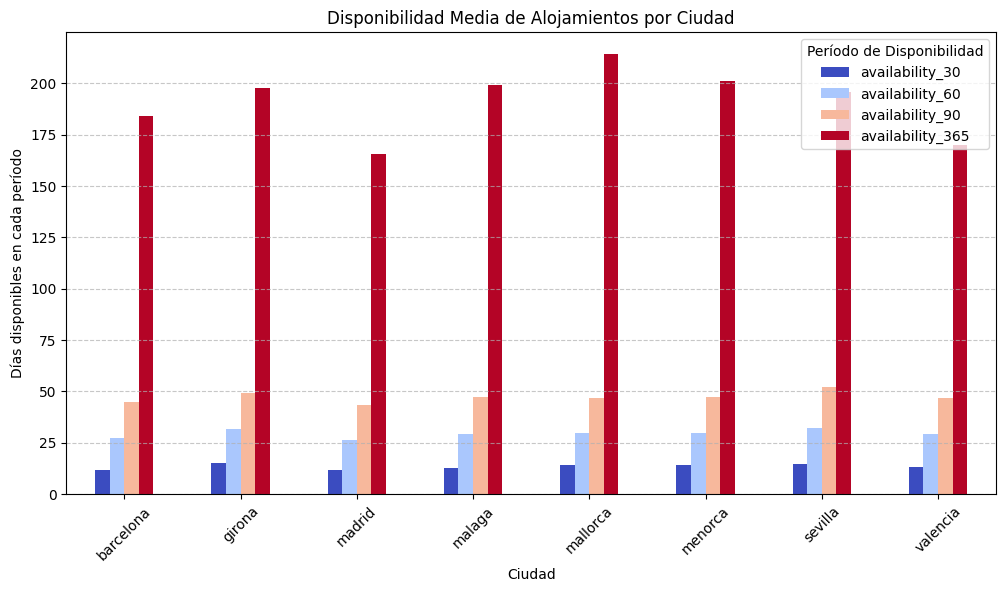

In [34]:
# Convertir las columnas de disponibilidad a numéricas sin crear nuevas tablas
cols_disponibilidad = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
for col in cols_disponibilidad:
    df_sin_duplicados[col] = pd.to_numeric(df_sin_duplicados[col], errors='coerce')

# Calcular la disponibilidad media por ciudad directamente
disponibilidad_media = df_sin_duplicados.groupby('city')[cols_disponibilidad].mean().round(2)

# Visualización con gráfico de barras
plt.figure(figsize=(12, 6))
disponibilidad_media.plot(kind='bar', colormap='coolwarm', ax=plt.gca())

plt.title("Disponibilidad Media de Alojamientos por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Días disponibles en cada período")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Período de Disponibilidad")
plt.show()


Disponibilidad media por ciudad en distintos períodos:
           availability_30  availability_60  availability_90  availability_365
city                                                                          
barcelona            11.97            27.28            44.76            184.01
girona               14.94            31.87            49.27            197.50
madrid               11.72            26.58            43.25            165.49
malaga               12.82            29.08            47.24            199.13
mallorca             14.09            29.92            46.93            214.22
menorca              14.29            29.91            47.21            201.14
sevilla              14.85            32.36            52.10            195.74
valencia             13.39            29.23            46.58            169.77


<Figure size 1200x600 with 0 Axes>

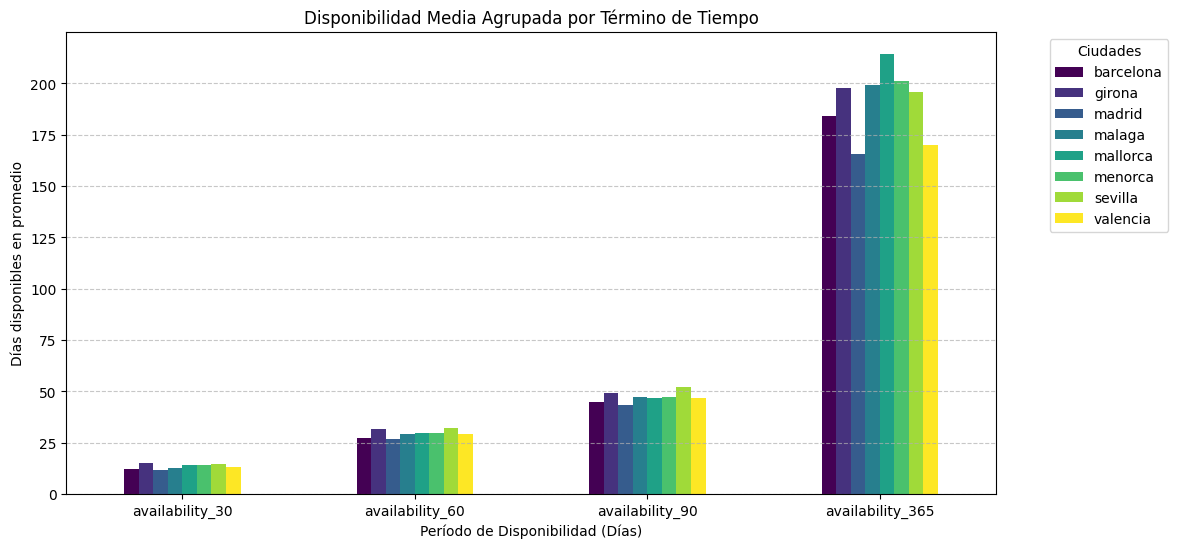

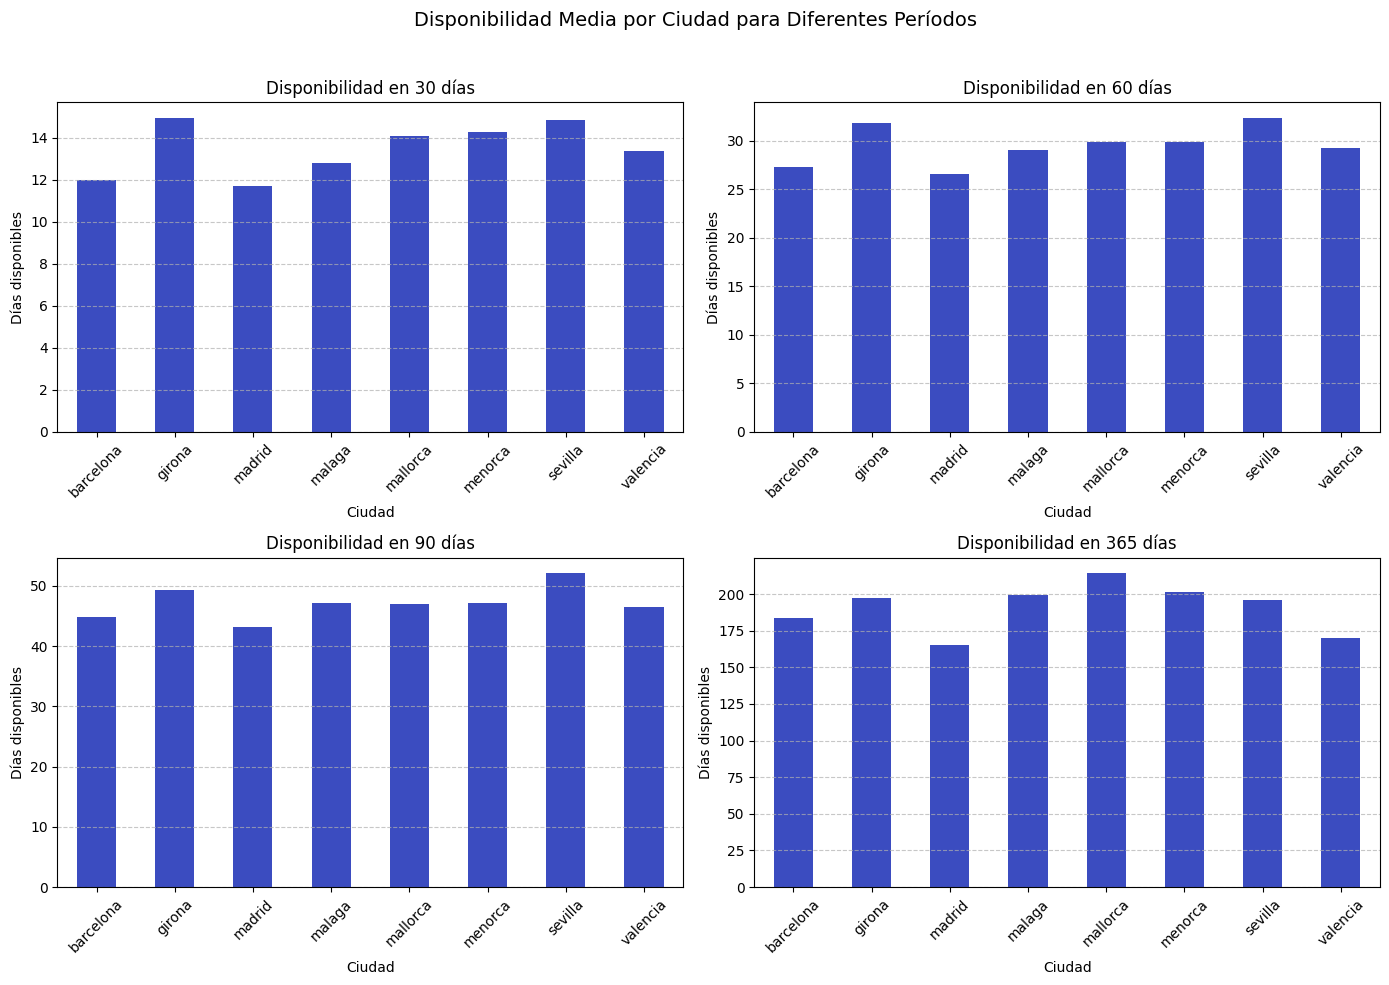

In [35]:
# Mostrar resultados
print("Disponibilidad media por ciudad en distintos períodos:")
print(disponibilidad_media)

# Gráfico agrupando por términos de tiempo (30, 60, 90, 365 días)
disponibilidad_transpuesta = disponibilidad_media.T  # Transponer el dataframe

plt.figure(figsize=(12, 6))
disponibilidad_transpuesta.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Disponibilidad Media Agrupada por Término de Tiempo")
plt.xlabel("Período de Disponibilidad (Días)")
plt.ylabel("Días disponibles en promedio")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Ciudades", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico separado para cada término de tiempo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Disponibilidad Media por Ciudad para Diferentes Períodos", fontsize=14)

periodos = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
titulos = ['Disponibilidad en 30 días', 'Disponibilidad en 60 días', 'Disponibilidad en 90 días', 'Disponibilidad en 365 días']

for ax, periodo, titulo in zip(axes.flatten(), periodos, titulos):
    disponibilidad_media[periodo].plot(kind='bar', ax=ax, colormap='coolwarm')
    ax.set_title(titulo)
    ax.set_xlabel("Ciudad")
    ax.set_ylabel("Días disponibles")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels(disponibilidad_media.index, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [36]:
# Crear una nueva tabla con la ocupación en cada plazo
df_ocupacion = disponibilidad_media.copy()
df_ocupacion['Ocupación_30'] = 1 - (df_ocupacion['availability_30'] / 30)
df_ocupacion['Ocupación_60'] = 1 - (df_ocupacion['availability_60'] / 60)
df_ocupacion['Ocupación_90'] = 1 - (df_ocupacion['availability_90'] / 90)
df_ocupacion['Ocupación_365'] = 1 - (df_ocupacion['availability_365'] / 365)

# Convertir a porcentaje
df_ocupacion[['Ocupación_30', 'Ocupación_60', 'Ocupación_90', 'Ocupación_365']] *= 100

# Calcular ocupación media por ciudad
ocupacion_media = df_ocupacion.groupby('city')[['Ocupación_30', 'Ocupación_60', 'Ocupación_90', 'Ocupación_365']].mean().sort_values(by= 'Ocupación_30', ascending= False )

# Mostrar resultados
print(ocupacion_media.round(2))


           Ocupación_30  Ocupación_60  Ocupación_90  Ocupación_365
city                                                              
madrid            60.93         55.70         51.94          54.66
barcelona         60.10         54.53         50.27          49.59
malaga            57.27         51.53         47.51          45.44
valencia          55.37         51.28         48.24          53.49
mallorca          53.03         50.13         47.86          41.31
menorca           52.37         50.15         47.54          44.89
sevilla           50.50         46.07         42.11          46.37
girona            50.20         46.88         45.26          45.89


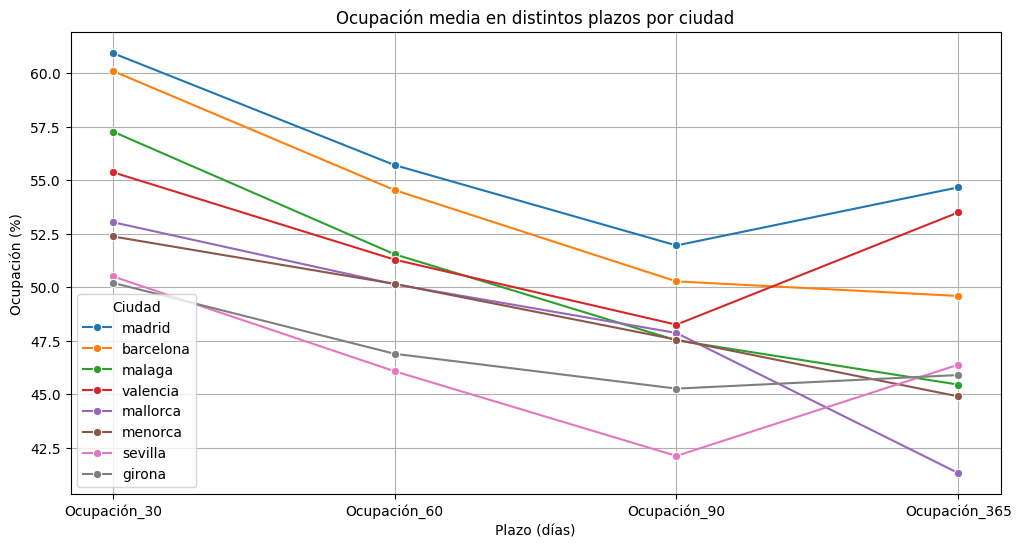

In [37]:
# Convertimos la tabla en formato largo para facilitar la visualización
df_ocupacion_long = ocupacion_media.reset_index().melt(id_vars='city', var_name='Plazo', value_name='Ocupación')

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ocupacion_long, x="Plazo", y="Ocupación", hue="city", marker="o")
plt.title("Ocupación media en distintos plazos por ciudad")
plt.ylabel("Ocupación (%)")
plt.xlabel("Plazo (días)")
plt.grid(True)
plt.legend(title="Ciudad")
plt.show()


### **Ocupación por ciudad**  

**Interpretación del gráfico:**  
- Nos permite ver cómo cambia la ocupación con el tiempo para cada ciudad.  
- Si las líneas son casi planas, significa que **la ocupación no varía mucho con el plazo**.  
- Si hay ciudades donde la ocupación **cae rápido en plazos largos**, puede indicar que tienen reservas más concentradas en el corto plazo.  

### **Análisis de la proporción de ocupación**  

#### **📊 ¿Qué observamos en los datos?**  
📌 **Poca variación entre ciudades**  
- No hay grandes diferencias en la ocupación entre ciudades.  
- Esto sugiere que la demanda es **relativamente pareja** en todas las ciudades analizadas.  

📌 **Tendencia de ocupación estable**  
- Aunque **los valores bajan a medida que aumentamos el plazo**, la caída no es tan fuerte.  
- Esto significa que muchos alojamientos tienen reservas a largo plazo, no solo en el corto plazo.  
- Esto puede deberse a que hay clientes que reservan con mucha anticipación, como turistas internacionales o eventos grandes.  

📌 **Madrid y Barcelona tienen la ocupación más alta**  
- **Madrid (61%) y Barcelona (60%) tienen más ocupación a 30 días** que el resto de ciudades.  
- Podría indicar que estas ciudades tienen más demanda en general, demanda inmediata y también se mantiene en reservas a largo plazo.  

📌 **Mallorca tiene ocupación baja en el largo plazo**  
- La ocupación en **Mallorca cae bastante en 365 días (41%)** comparado con otras ciudades.  
- Posiblemente porque es un destino estacional, con más ocupación en verano.
- en general este comportamiento se repite en casi **todas las ciudades costeras**, incluyendo Barcelona, Mayorca, Menorca y Málaga, que bajan su proporción de ocupación en los 365 días respecto de los 90 días.
- por el contrario, las ciudades que su atractivo no está relacionado con la costa, tienen mayor proporcion de ocupación en los 365 días respecto de los 90 días. Podemos inferir que las resevas no está ligadas a la estacionalidad en ciudades como: Sevilla, Madrid y Girona. La excepción sería Valencia, que aun siendo costera tiene mucha proporción de ocupación a 365 días. Podríamos inferir que hay otros factores a estudiar que influyen en este comportamiento.

---

### **Conclusión y alineación con el objetivo de negocio**  

**📌 Resumen de insights:**  
🔹 **La ocupación es bastante pareja entre ciudades**, lo que sugiere que la gestión debe enfocarse más en la variable tiempo que en la ubicación.  
🔹 **La disponibilidad aumenta en plazos largos**, lo que significa que hay margen para ajustar precios y promociones con anticipación.  
🔹 **Madrid y Barcelona tienen más ocupación**, indicando que hay más demanda en estas ciudades.  
🔹 **Mallorca y las ciudades costeras muestran estacionalidad en el largo plazo**, lo que confirma la importancia de ajustar estrategias por temporada.  


### Exportación del dataset limpio

In [38]:
df.to_csv("../Data/tourist_accommodation_clean.csv", index=False)

# KPIS

In [40]:
# Asegurar que la fecha está en formato datetime
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes y año
df['year_month'] = df['insert_date'].dt.to_period('M')

# Calcular disponibilidad promedio mensual
df_monthly = df.groupby('year_month')['availability_30'].mean().reset_index()

# Calcular la tasa de ocupación mensual
df_monthly['tasa_ocupacion'] = (1 - df_monthly['availability_30'] / 30) * 100

# Obtener la tasa de ocupación del mes actual y de la semana pasada
tasa_actual = df_monthly['tasa_ocupacion'].iloc[-1]
tasa_semana_pasada = 56.53  # Dato proporcionado

# Determinar el color de la flecha
color_flecha = 'green' if tasa_actual > tasa_semana_pasada else 'red'
simbolo_flecha = '▲' if tasa_actual > tasa_semana_pasada else '▼'

# Calcular tasa de ocupación por ciudad
df_city = df.groupby('city')['availability_30'].mean().reset_index()
df_city['tasa_ocupacion'] = (1 - df_city['availability_30'] / 30) * 100

# Obtener la ciudad con mayor ocupación
ciudad_max_ocupacion = df_city.loc[df_city['tasa_ocupacion'].idxmax()]

# Mostrar los resultados
print(f"📊 **Tasa de ocupación mensual:** {tasa_actual:.2f}% {simbolo_flecha} (vs. {tasa_semana_pasada}%)")
print(f"🏙️ **Ciudad con mayor ocupación:** {ciudad_max_ocupacion['city']} ({ciudad_max_ocupacion['tasa_ocupacion']:.2f}%)")


📊 **Tasa de ocupación mensual:** 53.57% ▼ (vs. 56.53%)
🏙️ **Ciudad con mayor ocupación:** madrid (61.01%)


In [41]:
import pandas as pd

# Suponiendo que tienes un DataFrame con la columna 'availability_30' y 'city'
# La tasa de ocupación se calcula como el porcentaje de días ocupados en el mes

# Cargar los datos (reemplázalo con tu DataFrame real)
# df = pd.read_csv("tu_archivo.csv")  # Si los datos están en un CSV

# Calcular la tasa de ocupación promedio
tasa_ocupacion_mensual = 100 - df['availability_30'].mean()

print(f"Tasa de ocupación mensual: {tasa_ocupacion_mensual:.2f}%")


Tasa de ocupación mensual: 86.99%


In [ ]:
# Suponiendo que tienes un DataFrame con la columna 'availability_30'

# Calcular los días ocupados como (30 - availability_30)
df['dias_ocupados'] = 30 - df['availability_30']

# Calcular la tasa de ocupación como (días ocupados / 30) * 100
tasa_ocupacion_mensual = (df['dias_ocupados'].sum() / (len(df) * 30)) * 100

print(f"Tasa de ocupación mensual: {tasa_ocupacion_mensual:.2f}%")


Tasa de ocupación mensual: 56.62%
